In [1]:
### Dependencies instantiation ###

# Only run this cell once, if you haven't run it yet
# This ensures that you have all the necessary dependencies installed

using Pkg
Pkg.activate("../")
Pkg.instantiate()

  Activating project at `~/GitRepos/QuantumPrimer.jl`


In [1]:
### Imports ###

include("../src/QuantumPrimer.jl")
using .QuantumPrimer

using Yao
using YaoPlots
using Graphs
using GraphRecipes
using LinearAlgebra
using Random
using Optimisers
using Statistics
using FFTW
using JLD2
using NPZ
using Plots
default(lw=2, ms=5, palette=:Set2_8)

function printt(x)
    show(stdout, "text/plain", x)
    println()
end

printt (generic function with 1 method)

#### Graph analysis

##### G info #####
Graph: [[1], [2], [3], [4], [5], [6], [1, 2], [1, 5], [2, 4], [2, 6], [3, 4], [4, 5], [4, 6]]
Signs: [0, 0, 0, 0, 0, 0, -1, -1, -1, 1, 1, 1, 1]
3 Cycles with signs [-1, -1, 1]: 
[([2, 4, 6], [[2, 4], [2, 6], [4, 6]]), ([1, 2, 4, 5], [[1, 2], [1, 5], [2, 4], [4, 5]]), ([1, 2, 4, 5, 6], [[1, 2], [1, 5], [2, 6], [4, 5], [4, 6]])]
Number of unbalanced cycles: 2
Frustration number and sign change vector: (1, [1, 1, -1, 1, 1, 1, 1])
---------------------------------
##### G spectrum info #####
Number of positive edges: 4
Degeneracy of the ground state: 2
Spectrum: [-5.0, -5.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
---------------------------------
##### L(G) spectrum info 

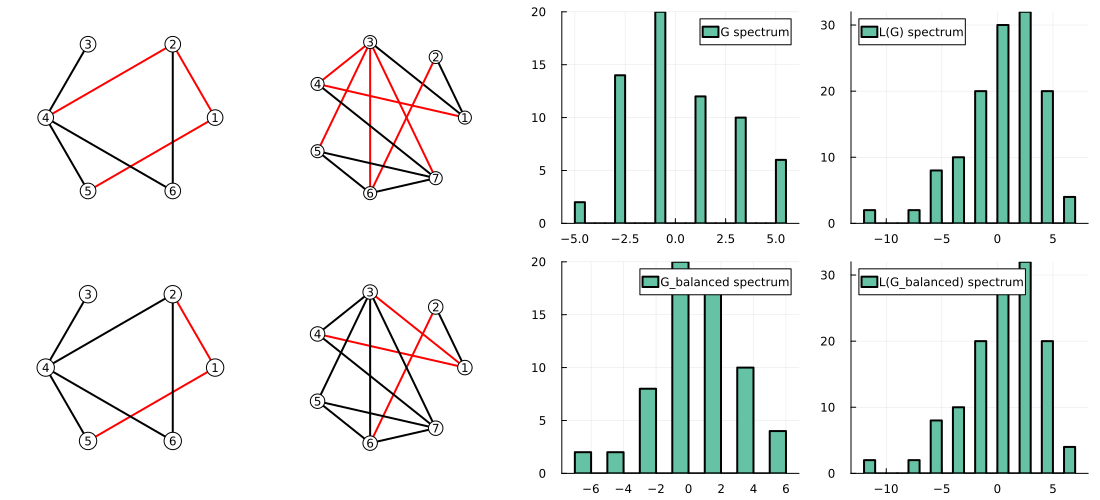

In [157]:
n = 6

G_test = create_random_signed_graph(n)
# G_test = classify_state_frustration_number(n, 1, 1)
# G_test = SignedGraph([[1], [2], [3], [1, 2], [2, 3], [1, 3]], [0, 0, 0, 1, 1, 1])
# G_test = SignedGraph([[1], [2], [3], [1, 2], [2, 3], [1, 3]], [0, 0, 0, 1, 1, -1])
# G_test = SignedGraph([[1], [2], [3], [1, 2], [2, 3], [1, 3]], [0, 0, 0, 1, -1, -1])
# G_test = SignedGraph([[1], [2], [3], [1, 2], [2, 3], [1, 3]], [0, 0, 0, -1, -1, -1])

# G_test = SignedGraph([[1], [2], [3], [4], [1, 2], [1, 3], [2, 3], [1, 4]], [0, 0, 0, 0, -1, -1, -1, -1])
# G_test = SignedGraph([[1], [2], [3], [4], [1, 2], [2, 3], [3, 4], [1, 4]], [0, 0, 0, 0, 1, 1, 1, 1])
# G_test = SignedGraph([[1], [2], [3], [4], [1, 2], [1, 3], [1, 4], [2, 4], [3, 4]], [0, 0, 0, 0, 1, 1, 1, 1, 1])
# G_test = SignedGraph([[1], [2], [3], [4], [1, 2], [1, 3], [2, 3], [2, 4], [3, 4]], [0, 0, 0, 0, -1, -1, -1, -1, -1])

# The following signed graph has 30 unbalanced cycles that can be balanced with 3 sign changes (frustration number = 3).
# The balanced version is the next signed graph.
# G_test = SignedGraph([[1], [2], [3], [4], [5], [6], [1, 2], [1, 5], [1, 6], [2, 3], [2, 4], [2, 5], [2, 6], [3, 4], [3, 5], [3, 6], [4, 6], [5, 6]], [0, 0, 0, 0, 0, 0, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
# G_test = SignedGraph([[1], [2], [3], [4], [5], [6], [1, 2], [1, 5], [1, 6], [2, 3], [2, 4], [2, 5], [2, 6], [3, 4], [3, 5], [3, 6], [4, 6], [5, 6]], [0, 0, 0, 0, 0, 0, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1])

println("##### G info #####")
println("Graph: ", G_test.l)
println("Signs: ", G_test.s)
println("$(length(find_cycles(G_test))) Cycles with signs $(evaluate_cycles_signs(G_test)): \n", find_cycles(G_test))
println("Number of unbalanced cycles: ", count_unbalanced_cycles(G_test))
println("Frustration number and sign change vector: ", find_frustration_index(G_test))
println("---------------------------------")
println("##### G spectrum info #####")
println("Number of positive edges: ", count(x -> x == 1, G_test.s))
# println("Number of negative eigenvalues: ", find_negative_eigs(G_test))
println("Degeneracy of the ground state: ", find_degeneracy_gs(G_test))
eigs_test = eigvals(create_hamiltonian_matrix(create_interaction_matrix(G_test)))
println("Spectrum: ", eigs_test)
println("---------------------------------")
println("##### L(G) spectrum info #####")
G_test_L = create_line_graph(G_test)
println("Number of positive edges: ", count(x -> x == 1, G_test_L.s))
# println("Number of negative eigenvalues: ", find_negative_eigs(G_test_L))
println("Degeneracy of the ground state: ", find_degeneracy_gs(G_test_L))
eigs_test_L = eigvals(create_hamiltonian_matrix(create_interaction_matrix(G_test_L)))
println("Spectrum: ", eigs_test_L)

println("\n")
println("##### G_balanced info #####")
# G_balanced = balance_signed_graph(G_test)
G_balanced = reduce_frustration_signed_graph(G_test, 1)
println("Graph: ", G_balanced.l)
println("Signs: ", G_balanced.s)
println("$(length(find_cycles(G_test))) Cycles with signs $(evaluate_cycles_signs(G_test)): \n", find_cycles(G_balanced))
println("Number of unbalanced cycles: ", count_unbalanced_cycles(G_balanced))
println("Frustration number and sign change vector: ", find_frustration_index(G_balanced))
println("---------------------------------")
println("##### G spectrum info #####")
println("Number of positive edges: ", count(x -> x == 1, G_balanced.s))
# println("Number of negative eigenvalues: ", find_negative_eigs(G_balanced))
println("Degeneracy of the ground state: ", find_degeneracy_gs(G_balanced))
eigs_balanced = eigvals(create_hamiltonian_matrix(create_interaction_matrix(G_balanced)))
println("Spectrum: ", eigs_test)
println("---------------------------------")
println("##### L(G) spectrum info #####")
G_balanced_L = create_line_graph(G_balanced)
println("Number of positive edges: ", count(x -> x == 1, G_balanced_L.s))
# println("Number of negative eigenvalues: ", find_negative_eigs(G_balanced_L))
println("Degeneracy of the ground state: ", find_degeneracy_gs(G_balanced_L))
eigs_balanced_L = eigvals(create_hamiltonian_matrix(create_interaction_matrix(G_balanced_L)))
println("Spectrum: ", eigs_balanced_L)

# println("\n")
# println("G and G_balanced have the same spectrum: ", eigs_test == eigs_balanced)
# println("L(G) and L(G_balanced) have the same spectrum: ", eigs_test_L == eigs_balanced_L)

println("\n")
# println("Skewness ratio between eigs_G and eigs_G_L: ", skewness(eigs_test) / skewness(eigs_test_L))
# println("Skewness ratio between eigs_Gbal and eigs_Gbal_L: ", skewness(eigs_balanced) / skewness(eigs_balanced_L))
println("Frustration index G: ", find_frustration_index(G_test)[1])
println("Frustration index G_balanced: ", find_frustration_index(G_balanced)[1])
println("Difference of frustration indices: ", abs(find_frustration_index(G_test)[1] - find_frustration_index(G_balanced)[1]))
println("Difference of skewness ratios: ", skewness(eigs_balanced) / skewness(eigs_balanced_L) - skewness(eigs_test) / skewness(eigs_balanced_L))

##########################
##########################

Plots.plot()
p3 = Plots.histogram!(eigs_test, bins=20, label="G spectrum")
Plots.plot()
p4 = Plots.histogram!(eigs_test_L, bins=20, label="L(G) spectrum")

##########################
##########################

Plots.plot()
p7 = Plots.histogram!(eigs_balanced, bins=20, label="G_balanced spectrum")
Plots.plot()
p8 = Plots.histogram!(eigs_balanced_L, bins=20, label="L(G_balanced) spectrum")

##########################
##########################

simple_graph, dataset, edgecolor_mat = plot_signed_graph(G_test)
p1 = graphplot(simple_graph, 
          x=[i[1] for i in dataset], 
          y=[i[2] for i in dataset], 
          names=1:nv(simple_graph), 
          nodeshape=:circle,
          nodesize=0.18,
          nodecolor=:white,
          fontsize=8,
          curves=false,
          linewidth=2,
          edgecolor=edgecolor_mat)

##########################
##########################

simple_graph, dataset, edgecolor_mat = plot_signed_graph(create_line_graph(G_test))
p2 = graphplot(simple_graph, 
          x=[i[1] for i in dataset], 
          y=[i[2] for i in dataset], 
          names=1:nv(simple_graph), 
          nodeshape=:circle,
          nodesize=0.18,
          nodecolor=:white,
          fontsize=8,
          curves=false,
          linewidth=2,
          edgecolor=edgecolor_mat)

##########################
##########################

simple_graph, dataset, edgecolor_mat = plot_signed_graph(G_balanced)
p5 = graphplot(simple_graph, 
          x=[i[1] for i in dataset], 
          y=[i[2] for i in dataset], 
          names=1:nv(simple_graph), 
          nodeshape=:circle,
          nodesize=0.2,
          nodecolor=:white,
          fontsize=8,
          curves=false,
          linewidth=2,
          edgecolor=edgecolor_mat)

##########################
##########################

simple_graph, dataset, edgecolor_mat = plot_signed_graph(create_line_graph(G_balanced))
p6 = graphplot(simple_graph, 
          x=[i[1] for i in dataset], 
          y=[i[2] for i in dataset], 
          names=1:nv(simple_graph), 
          nodeshape=:circle,
          nodesize=0.2,
          nodecolor=:white,
          fontsize=8,
          curves=false,
          linewidth=2,
          edgecolor=edgecolor_mat)

##########################
##########################

Plots.plot(p1, p2, p3, p4, p5, p6, p7, p8, layout=(2, 4), size=(1100, 500))

#### DOS - skewness routine (NISQ)

In [ ]:
# Define system size
n = 6

G_test = create_random_signed_graph(n)

# Example fully positive complete signed graph
# G_test = SignedGraph(vcat([[i] for i in 1:4], [[1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]), [0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# Prepare maximally mixed state
psi = completely_mixed_state(n)
# psi = rand_density_matrix(n)

println("The maximum diagonal entry of the Ising Hamiltonian is binomial(n, 2). This happens with a fully positive complete signed graph.")
println("Maximum diagonal entry: ", binomial(n, 2))
println(diag(create_hamiltonian_matrix(create_interaction_matrix(G_test))))

The maximum diagonal entry of the Ising Hamiltonian is binomial(n, 2). This happens with a fully positive complete signed graph.
Maximum diagonal entry: 15
ComplexF64[1.0 - 0.0im, -1.0 - 0.0im, 1.0 - 0.0im, -1.0 - 0.0im, 3.0 - 0.0im, 1.0 - 0.0im, -1.0 - 0.0im, -3.0 - 0.0im, -1.0 - 0.0im, -3.0 - 0.0im, -1.0 - 0.0im, -3.0 - 0.0im, 1.0 - 0.0im, -1.0 - 0.0im, -3.0 - 0.0im, -5.0 - 0.0im, -3.0 - 0.0im, -1.0 - 0.0im, 1.0 - 0.0im, 3.0 - 0.0im, -1.0 - 0.0im, 1.0 - 0.0im, -1.0 - 0.0im, 1.0 - 0.0im, -1.0 - 0.0im, 1.0 - 0.0im, 3.0 - 0.0im, 5.0 - 0.0im, 1.0 - 0.0im, 3.0 - 0.0im, 1.0 - 0.0im, 3.0 - 0.0im, 3.0 - 0.0im, 1.0 - 0.0im, 3.0 - 0.0im, 1.0 - 0.0im, 5.0 - 0.0im, 3.0 - 0.0im, 1.0 - 0.0im, -1.0 - 0.0im, 1.0 - 0.0im, -1.0 - 0.0im, 1.0 - 0.0im, -1.0 - 0.0im, 3.0 - 0.0im, 1.0 - 0.0im, -1.0 - 0.0im, -3.0 - 0.0im, -5.0 - 0.0im, -3.0 - 0.0im, -1.0 - 0.0im, 1.0 - 0.0im, -3.0 - 0.0im, -1.0 - 0.0im, -3.0 - 0.0im, -1.0 - 0.0im, -3.0 - 0.0im, -1.0 - 0.0im, 1.0 - 0.0im, 3.0 - 0.0im, -1.0 - 0.0im, 1.0 - 0.0

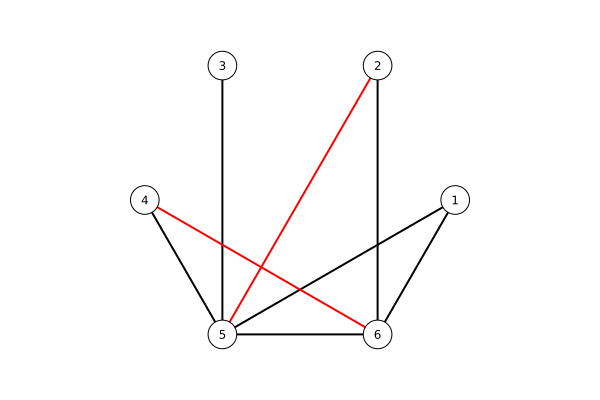

In [ ]:
simple_graph, dataset, edgecolor_mat = plot_signed_graph(G_test)
graphplot(simple_graph, 
          x=[i[1] for i in dataset], 
          y=[i[2] for i in dataset], 
          names=1:nv(simple_graph), 
          nodeshape=:circle,
          nodesize=0.18,
          nodecolor=:white,
          fontsize=8,
          curves=false,
          linewidth=2,
          edgecolor=edgecolor_mat)

In [ ]:
function eval_tr_U(H, t)
    U = exp(-1im * H * t)
    return tr(Matrix(U))
end

function eval_positivity(H)
    println("Determinant of H: ", det(H))
    println("Trace of H: ", tr(H))
    return isposdef(H)
end

# n = 4
# rand_graph = create_random_signed_graph(n)

# LIFT Hamiltonian
H_graph = create_hamiltonian_matrix(create_interaction_matrix(G_test)) .+ binomial(n, 2) * Matrix{Float64}(I, 2^n, 2^n)

t0 = rand()*10

println(diag(H_graph))
println()
println("Positivity: ", eval_positivity(H_graph))
println()
println(eval_tr_U(H_graph, t0))
println(eval_tr_U(H_graph, -t0))

ComplexF64[11.0 - 0.0im, 15.0 - 0.0im, 11.0 - 0.0im, 15.0 - 0.0im, 13.0 - 0.0im, 17.0 - 0.0im, 13.0 - 0.0im, 17.0 - 0.0im, 11.0 - 0.0im, 15.0 - 0.0im, 11.0 - 0.0im, 15.0 - 0.0im, 13.0 - 0.0im, 17.0 - 0.0im, 13.0 - 0.0im, 17.0 - 0.0im, 17.0 - 0.0im, 17.0 - 0.0im, 21.0 - 0.0im, 21.0 - 0.0im, 15.0 - 0.0im, 15.0 - 0.0im, 19.0 - 0.0im, 19.0 - 0.0im, 13.0 - 0.0im, 13.0 - 0.0im, 17.0 - 0.0im, 17.0 - 0.0im, 11.0 - 0.0im, 11.0 - 0.0im, 15.0 - 0.0im, 15.0 - 0.0im, 15.0 - 0.0im, 15.0 - 0.0im, 11.0 - 0.0im, 11.0 - 0.0im, 17.0 - 0.0im, 17.0 - 0.0im, 13.0 - 0.0im, 13.0 - 0.0im, 19.0 - 0.0im, 19.0 - 0.0im, 15.0 - 0.0im, 15.0 - 0.0im, 21.0 - 0.0im, 21.0 - 0.0im, 17.0 - 0.0im, 17.0 - 0.0im, 17.0 - 0.0im, 13.0 - 0.0im, 17.0 - 0.0im, 13.0 - 0.0im, 15.0 - 0.0im, 11.0 - 0.0im, 15.0 - 0.0im, 11.0 - 0.0im, 17.0 - 0.0im, 13.0 - 0.0im, 17.0 - 0.0im, 13.0 - 0.0im, 15.0 - 0.0im, 11.0 - 0.0im, 15.0 - 0.0im, 11.0 - 0.0im]

Determinant of H: 5.923343510548807e74 - 0.0im
Trace of H: 960.0 + 0.0im
Positivity: true

2

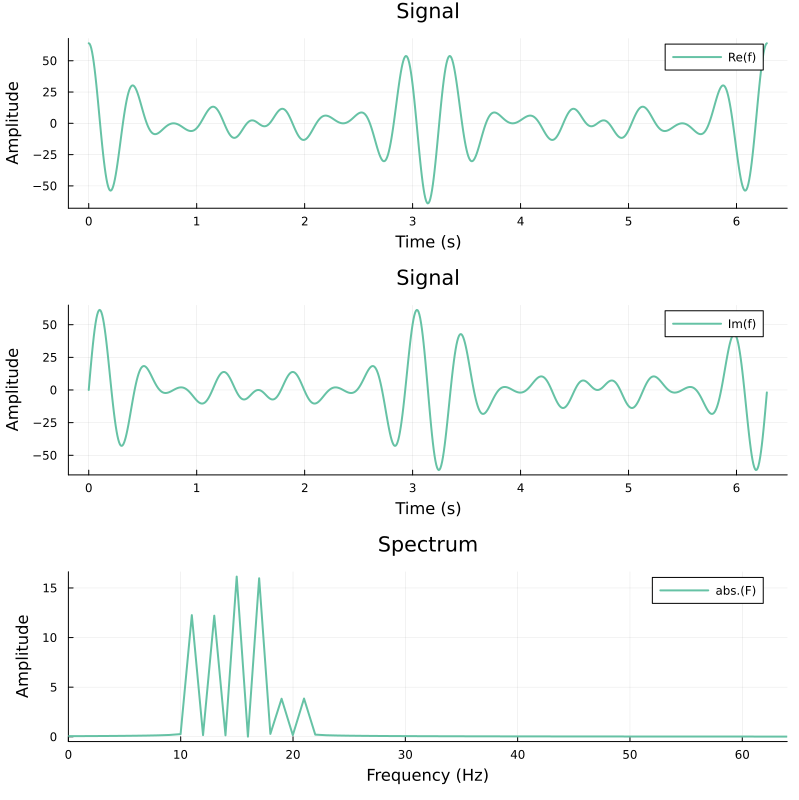

In [ ]:
# H_test = diagm(rand(2^n))
H_test = H_graph

t0 = 0 # Start time
tmax = 2π # End time
fs = 1 * (2*2^n) # Sampling rate (Hz)
# fs = 10 # Sampling rate (Hz)

t = t0:1/fs:tmax;
# signal = cos.(2π * 2 .* t)
# fun = (H, t) -> tr(exp(1im * Matrix(H) * t))
fun = (H, t) -> sum(exp.(1im * diag(H) * t)) # ONLY WORKS FOR DIAGONAL MATRICES
fun_Htest = t -> fun(H_test, t)
signal = fun_Htest.(t)

freqs = fftshift(fftfreq(length(t), fs)) .* 2π
F = fftshift(fft(signal))
dos = abs.(F) * 2^n / fs / 100 / (2.)^(n-4)

# # plots 
time_domain_re = Plots.plot(t, real.(signal), title = "Signal", label="Re(f)",legend=:topright, xlabel="Time (s)", ylabel="Amplitude")
time_domain_im = Plots.plot(t, imag.(signal), title = "Signal", label="Im(f)",legend=:topright, xlabel="Time (s)", ylabel="Amplitude")
freq_domain = Plots.plot(freqs, dos, xlims=[0, 2^n], title = "Spectrum", label="abs.(F)",legend=:topright, xlabel="Frequency (Hz)", ylabel="Amplitude")
Plots.plot(time_domain_re, time_domain_im, freq_domain, layout = (3,1), size = (800, 800))

Spectrum (exact): 		[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 12, 0, 16, 0, 16, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Sum: 64

Spectrum (round Fourier coeff): 	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 12, 0, 16, 0, 16, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Sum (sum of round coeffs): 64

Skewness of the exact spectrum: 0.27157190710456003
Skewness of the Fourier coefficients: 0.27157190710456003
Frustration index G: 2
Frustration index G_balanced: 1
Difference of frustration indices: 1
Difference of skewness: 0.5431438142091201


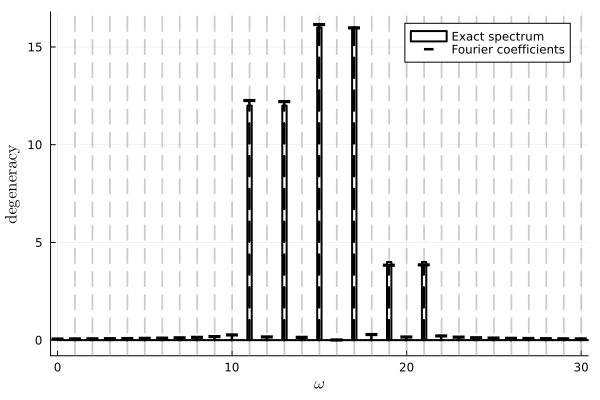

In [ ]:
eigs = [i for i in eigvals(Matrix(H_test)) if i>1e-10]

idx_shift = findfirst(x -> abs(x) < 1e-10, freqs)
freqs_pos = freqs[idx_shift+1:end]
dos_spectrum_pos = round.(Int, dos[idx_shift+1:idx_shift+2^n])

dos_spectrum = dos_spectrum_pos

# print coefficients
print("Spectrum (exact): \t\t" * string([count(j -> (j==ii), [round(i) for i in eigs if i>1e-10]) for ii in 1:2^n]) * "\n")
print("Sum: " * string(sum([count(j -> (j==ii), [round(i) for i in eigs if i>1e-10]) for ii in 0:2^n])) * "\n\n")
print("Spectrum (round Fourier coeff): \t" * string(dos_spectrum_pos) * "\n")
print("Sum (sum of round coeffs): " * string(sum(dos_spectrum_pos)) * "\n")
println()
println("Skewness of the exact spectrum: ", skewness(eigs))
eigs_rebuilt = [Float64(i) for i in 1:2^n for j in 1:dos_spectrum_pos[i]]
println("Skewness of the Fourier coefficients: ", skewness(eigs_rebuilt))


G_balanced = reduce_frustration_signed_graph(G_test, 1)
eigs_balanced = eigvals(create_hamiltonian_matrix(create_interaction_matrix(G_balanced)))
println("Frustration index G: ", find_frustration_index(G_test)[1])
println("Frustration index G_balanced: ", find_frustration_index(G_balanced)[1])
println("Difference of frustration indices: ", abs(find_frustration_index(G_test)[1] - find_frustration_index(G_balanced)[1]))
println("Difference of skewness: ", skewness(eigs) - skewness(eigs_balanced))

# plot coefficients vs spectrum
Plots.plot()
Plots.plot!([i for i in 1:2^n], lw=1.8, la=0.4, ls=:dash, lc=:gray, seriestype="vline", label=false)

yy_histo = [i for i in eigs if i>1e-10]
yy_histo_sum = [count(j -> (j==ii), [round(i) for i in eigs if i>1e-10]) for ii in 0:2^n]
width = 1/4
Plots.histogram!(yy_histo, bins=0+(width/2):width:2^n+1+(width/2), xlabel="\$\\omega\$", ylabel="\$\\mathrm{degeneracy}\$",
    color=:white,
    label="Exact spectrum")

Plots.plot!(freqs, dos,
    color=:black,
    seriestype=:sticks,
    linestyle=:dash,
    lw=2.5,
    markershape=:hline,
    markersize=6,
    markerstrokewidth=4,
    label="Fourier coefficients",
    legend=:topright,
    xlim=(-0.4, 2*binomial(n, 2)+0.4), # window to 2*binomial(n, 2) because of spectrum LIFT
    ylim=(min(minimum(yy_histo_sum), minimum(dos_spectrum))-0.8, max(maximum(yy_histo_sum), maximum(dos_spectrum))+0.8))

#### DOS - generate dataset for multinomial linear regression

In [ ]:
import StatsBase.sample

n = 6
n_points = 100

##########################
##########################

frustr_series = Vector{Int}(undef, n_points)
skewness_series = Vector{Float64}(undef, n_points)
for i in 1:n_points
    G_test = create_random_signed_graph(n)
    # eigs_test = eigvals(create_hamiltonian_matrix(create_interaction_matrix(G_test)))
    eigs_test = diag(create_hamiltonian_matrix(create_interaction_matrix(G_test))) # ONLY WORKS FOR DIAGONAL HAMILTONIAN (no transversal field)

    G_test_L = create_line_graph(G_test)
    # eigs_test_L = eigvals(create_hamiltonian_matrix(create_interaction_matrix(G_test_L)))
    eigs_test_L = diag(create_hamiltonian_matrix(create_interaction_matrix(G_test_L)))

    G_test_frustration = find_frustration_index(G_test)[1]
    # G_test_frustration == 0 ? continue : nothing

    G_balanced = reduce_frustration_signed_graph(G_test, sample(0:G_test_frustration))
    # eigs_balanced = eigvals(create_hamiltonian_matrix(create_interaction_matrix(G_balanced)))
    eigs_balanced = diag(create_hamiltonian_matrix(create_interaction_matrix(G_balanced)))
    
    G_balanced_L = create_line_graph(G_balanced)
    # eigs_balanced_L = eigvals(create_hamiltonian_matrix(create_interaction_matrix(G_balanced_L)))
    eigs_balanced_L = diag(create_hamiltonian_matrix(create_interaction_matrix(G_balanced_L)))

    frustr_idx_diff = find_frustration_index(G_test)[1] - find_frustration_index(G_balanced)[1]
    skewness_ratio_diff = skewness(real(eigs_balanced)) / skewness(real(eigs_balanced_L)) - skewness(real(eigs_test)) / skewness(real(eigs_balanced_L))

    frustr_series[i] = frustr_idx_diff
    skewness_series[i] = skewness_ratio_diff
end

##########################
##########################

Plots.plot()
Plots.scatter!(frustr_series, skewness_series, ma=0.3, shape=:rect, label="Frustration-skewness correlation", xlabel="Frustration index difference", ylabel="Skewness ratio difference", legend=:inside)

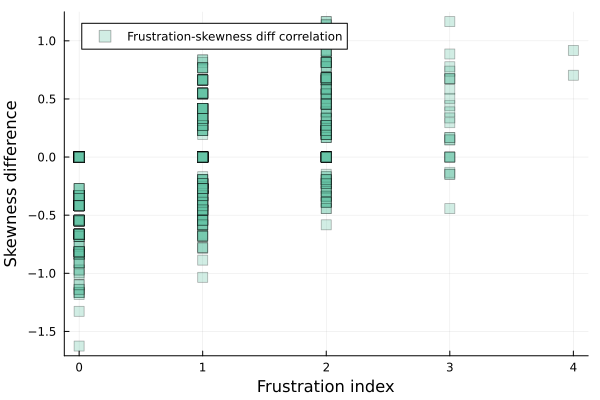

In [ ]:
###
### Frustration index / (skewness-skewness_balanced) correlation
###

n = 6
n_points = 1000

##########################
##########################

frustr_series = Vector{Int}(undef, n_points)
skewness_series = Vector{Float64}(undef, n_points)
visited = []
i = 1
while i <= n_points
    G_test = create_random_signed_graph(n)
    if G_test in visited
        continue
    end
    eigs_test = diag(create_hamiltonian_matrix(create_interaction_matrix(G_test))) # ONLY WORKS FOR DIAGONAL HAMILTONIAN (no transversal field)

    G_balanced = balance_signed_graph(G_test)
    eigs_balanced = diag(create_hamiltonian_matrix(create_interaction_matrix(G_balanced)))
    
    # frustr_idx_diff = find_frustration_index(G_test)[1] - find_frustration_index(G_balanced)[1]
    skewness_diff = skewness(real(eigs_balanced)) - skewness(real(eigs_test))

    frustr_series[i] = find_frustration_index(G_test)[1]
    skewness_series[i] = skewness(real(eigs_test))
    push!(visited, G_test)
    i += 1
end

##########################
##########################

Plots.plot()
Plots.scatter!(frustr_series, skewness_series, ma=0.3, label="Frustration-skewness diff correlation", shape=:rect, xlabel="Frustration index", ylabel="Skewness difference", legend=:topleft)

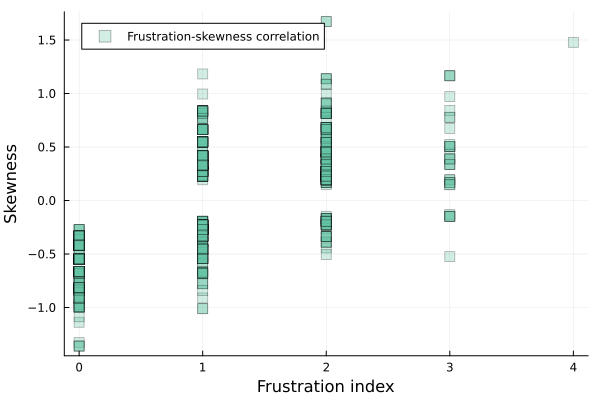

In [ ]:
###
### Frustration index / skewness correlation
###

n = 6
n_points = 1000

##########################
##########################

frustr_series = Vector{Int}(undef, n_points)
skewness_series = Vector{Float64}(undef, n_points)
visited = []
i = 1
while i <= n_points
    G_test = create_random_signed_graph(n)
    G_test in visited ? continue : nothing
    eigs_test = diag(create_hamiltonian_matrix(create_interaction_matrix(G_test))) # diag() ONLY WORKS FOR DIAGONAL HAMILTONIAN (no transversal field)
    skew = skewness(real(eigs_test))
    abs(skew) < 1e-12 ? continue : nothing # REMOVE THE ZERO SKEWNESS POINTS TO HELP THE LOGISTIC REGRESSION
    frustr_series[i] = find_frustration_index(G_test)[1]
    skewness_series[i] = skew
    push!(visited, G_test)
    i += 1
end

##########################
##########################

Plots.plot()
Plots.scatter!(frustr_series, skewness_series, ma=0.3, shape=:rect, label="Frustration-skewness correlation", xlabel="Frustration index", ylabel="Skewness")

In [ ]:
# Int.(frustr_series)

# for i in eachindex(skewness_series)
#     if abs(skewness_series[i]) < 1e-14
#         skewness_series[i] = 0
#     end
# end

# npzwrite("../data/skewness/skewness_multinomial_n$(n).npz", Dict("frustr_series" => frustr_series, "skewness_series" => skewness_series))
npzwrite("../data/skewness/skewness_multinomial_n$(n)_lesszeros.npz", Dict("frustr_series" => frustr_series, "skewness_series" => skewness_series))

#### Test - skewness of thermal state

In [9]:
H(g) = create_hamiltonian_matrix(create_interaction_matrix(g))
H2(g) = create_hamiltonian_matrix(create_interaction_matrix(g))^2
H3(g) = create_hamiltonian_matrix(create_interaction_matrix(g))^3

Z(β, g) = tr(exp(-β*H(g)))
# Z2 = tr(exp(-β*H2))
# Z3 = tr(exp(-β*H3))

ρ(β, g) = exp(-β*H(g)) / Z(β, g)
# ρ2 = exp(-β*H2) / Z2
# ρ3 = exp(-β*H3) / Z3

μ3(β, g) = tr(ρ(β, g) * H3(g)) - 3 * tr(ρ(β, g) * H2(g)) * tr(ρ(β, g) * H(g)) + 2 * tr(ρ(β, g) * H(g))^3
σ3(β, g) = (tr(ρ(β, g) * H2(g)) - tr(ρ(β, g) * H(g))^2)^(3/2)

γ(β, g) = μ3(β, g) / σ3(β, g)

γ (generic function with 1 method)

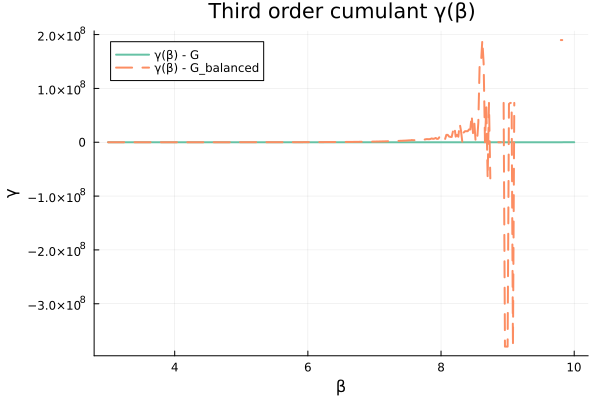

In [10]:
β_sweep = 3.:0.02:10.0

Plots.plot(title="Third order cumulant γ(β)")
Plots.plot!(β_sweep, real.([γ(β, G_test) for β in β_sweep]), label="γ(β) - G", xlabel="β", ylabel="γ")
# Plots.plot!(β_sweep, real.([γ(β, G_test_L) for β in β_sweep]), label="γ(β) - G_L")
Plots.plot!(β_sweep, real.([γ(β, G_balanced) for β in β_sweep]), ls=:dash, label="γ(β) - G_balanced")
# Plots.plot!(β_sweep, real.([γ(β, G_balanced_L) for β in β_sweep]), ls=:dash, label="γ(β) - G_balanced_L")

In [11]:
skewness(eigs_test)

-0.663594470046083

#### Datasets

In [12]:
#############################
########### QNN #############
#############################

seed = 1234 # set seed for reproducibility
Random.seed!(seed)
 
n_graph = 3 # number of vertices
n = nextpow(2, binomial(n_graph, 2)) # smallest power of 2 that is larger than the number of possible edges in the line graph
n_samples = 20 # number of samples per class
β = 100.
threshold = 0

graphs1 = []
states1 = ArrayReg{}[]
while length(states1) < n_samples*2
    try
        # push!(states1, create_purified_state(τ0, classify_state_negative_spectrum(n_graph, 1)))
        # push!(states1, create_purified_state(τ0, classify_state_degeneracy(n_graph, 1)))
        ####
        tmp_graph = classify_state_frustration_index(n_graph, threshold, 1)
        if all([tmp_graph != ele for ele in graphs1])
            push!(states1, create_purified_state(β, tmp_graph))
        end
    catch
        continue
    end
end

graphs2 = []
states2 = ArrayReg{}[]
while length(states2) < n_samples*2
    try
        # push!(states2, create_purified_state(τ0, classify_state_negative_spectrum(n_graph, -1)))
        # push!(states2, create_purified_state(τ0, classify_state_degeneracy(n_graph, -1)))
        ####
        tmp_graph = classify_state_frustration_index(n_graph, threshold, -1)
        if all([tmp_graph != ele for ele in graphs2])
            push!(states2, create_purified_state(β, tmp_graph))
        end
    catch
        continue
    end
end

if maximum([nactive(states1[i]) for i in 1:length(states1)]) > n || maximum([nactive(states2[i]) for i in 1:length(states2)]) > n
    error("Not enough qubits in the model, increase n.")
end

for i in 1:n_samples*2
    append_qubits!(states1[i], n - nactive(states1[i]))
    append_qubits!(states2[i], n - nactive(states2[i]))
end
 
# train
tr_states = vcat([states1[1:n_samples], states2[1:n_samples]]...)
tr_labels = vcat([repeat([1], n_samples), repeat([-1], n_samples)]...)
 
# test
te_states = vcat([states1[n_samples+1:n_samples*2], states2[n_samples+1:n_samples*2]]...)
te_labels = vcat([repeat([1], n_samples), repeat([-1], n_samples)]...)
 
# structures
d1 = Data(tr_states, tr_labels);
d2 = Data(te_states, te_labels);

In [13]:
#############################
########### QNN #############
#############################

seed = 1234 # set seed for reproducibility
Random.seed!(seed)
 
n_graph = 3 # number of vertices
n = nextpow(2, binomial(n_graph, 2)) # smallest power of 2 that is larger than the number of possible edges in the line graph
n_samples = 20 # number of samples per class
β = [1e-2, 1e-1, 1e0, 1e1, 1e2] # inverse temperature to prepare the Gibbs state
threshold = 0 # threshold for the frustration index

graphs1 = []
states1 = ArrayReg{}[]
while length(states1) < n_samples*2
    try
        tmp_graph = classify_state_frustration_index(n_graph, threshold, 1)
        if all([tmp_graph != ele for ele in graphs1])
            psi_list = ArrayReg{}[]
            for β_i in β
                push!(psi_list, create_purified_state(β_i, tmp_graph))
            end
            push!(states1, sum(psi_list))
        end
    catch
        continue
    end
end

graphs2 = []
states2 = ArrayReg{}[]
while length(states2) < n_samples*2
    try
        tmp_graph = classify_state_frustration_index(n_graph, threshold, -1)
        if all([tmp_graph != ele for ele in graphs2])
            psi_list = ArrayReg{}[]
            for β_i in β
                push!(psi_list, create_purified_state(β_i, tmp_graph))
            end
            push!(states2, sum(psi_list))
        end
    catch
        continue
    end
end

if maximum([nactive(states1[i]) for i in 1:length(states1)]) > n || maximum([nactive(states2[i]) for i in 1:length(states2)]) > n
    error("Not enough qubits in the model, increase n.")
end

for i in 1:n_samples*2
    append_qubits!(states1[i], n - nactive(states1[i]))
    append_qubits!(states2[i], n - nactive(states2[i]))
end
 
# train
tr_states = vcat([states1[1:n_samples], states2[1:n_samples]]...)
tr_labels = vcat([repeat([1], n_samples), repeat([-1], n_samples)]...)
 
# test
te_states = vcat([states1[n_samples+1:n_samples*2], states2[n_samples+1:n_samples*2]]...)
te_labels = vcat([repeat([1], n_samples), repeat([-1], n_samples)]...)
 
# structures
d1 = Data(tr_states, tr_labels);
d2 = Data(te_states, te_labels);

In [14]:
#############################
########### QSNN ############
#############################

seed = 1234 # set seed for reproducibility
Random.seed!(seed)
 
n_graph = 3 # number of vertices
n = nextpow(2, binomial(n_graph, 2)) # smallest power of 2 that is larger than the number of possible edges in the line graph
n_samples = 20 # number of samples per class
β = 100. # inverse temperature to prepare the Gibbs state
threshold = 0 # threshold for the frustration index

graphs1 = []
states1 = ArrayReg{}[]
while length(states1) < n_samples*2
    try
        # push!(states1, create_purified_state(τ0, classify_state_negative_spectrum(n_graph, 1)))
        # push!(states1, create_purified_state(τ0, classify_state_degeneracy(n_graph, 1)))
        ####
        tmp_graph = classify_state_frustration_index(n_graph, threshold, 1)
        if all([tmp_graph != ele for ele in graphs1])
            push!(states1, create_purified_state(β, tmp_graph))
        end
    catch
        continue
    end
end

graphs2 = []
states2 = ArrayReg{}[]
while length(states2) < n_samples*2
    try
        # push!(states2, create_purified_state(τ0, classify_state_negative_spectrum(n_graph, -1)))
        # push!(states2, create_purified_state(τ0, classify_state_degeneracy(n_graph, -1)))
        ####
        tmp_graph = classify_state_frustration_index(n_graph, threshold, -1)
        if all([tmp_graph != ele for ele in graphs2])
            push!(states2, create_purified_state(β, tmp_graph))
        end
    catch
        continue
    end
end

if maximum([nactive(states1[i]) for i in 1:length(states1)]) > n || maximum([nactive(states2[i]) for i in 1:length(states2)]) > n
    error("Not enough qubits in the model, increase n.")
end

for i in 1:2*n_samples
    append_qubits!(states1[i], n - nactive(states1[i]))
    append_qubits!(states2[i], n - nactive(states2[i]))
end

psi1 = deepcopy(states1)
psi2 = deepcopy(states2)

states1 = Vector{NTuple{2, ArrayReg}}(undef, 2*n_samples)
states2 = Vector{NTuple{2, ArrayReg}}(undef, 2*n_samples)

for i in 1:n_samples
    states1[i] = (rand(psi1), rand(psi1)) # zero vs zero states
    states2[i] = (rand(psi1), rand(psi2)) # zero vs entangled states
    states1[n_samples+i] = (rand(psi2), rand(psi2)) # entangled vs entangled states
    states2[n_samples+i] = (rand(psi2), rand(psi1)) # entangled vs zero states
end

# train
tr_states = vcat([states1[1:n_samples], states2[1:n_samples]]...)
tr_labels = vcat([repeat([1], n_samples), repeat([-1], n_samples)]...)

# test
te_states = vcat([states1[n_samples+1:n_samples*2], states2[n_samples+1:n_samples*2]]...)
te_labels = vcat([repeat([1], n_samples), repeat([-1], n_samples)]...)

# structures
d1 = DataSiamese(tr_states, tr_labels);
d2 = DataSiamese(te_states, te_labels);

Dataset with information of the graph and its line graph, $(\rho_\beta^{\mathcal{G}}, \rho_\beta^{\mathcal{L}(\mathcal{G})})$

In [36]:
#############################
########### QSNN ############
#############################

# Thermal state of a graph and its line graph

seed = 1234 # set seed for reproducibility
Random.seed!(seed)
 
n_graph = 3 # number of vertices
n = nextpow(2, binomial(n_graph, 2)) # smallest power of 2 that is larger than the number of possible edges in the line graph
n_samples = 20 # number of samples per class
β = 100. # inverse temperature to prepare the Gibbs state
threshold = 0 # threshold for the frustration index

graphs1 = []
psi1 = ArrayReg{}[]
psi1_line = ArrayReg{}[]
while length(psi1) < n_samples*2
    try
        tmp_graph = classify_state_frustration_index(n_graph, threshold, 1)
        if all([tmp_graph != ele for ele in graphs1])
            psi1_tmp = create_purified_state(β, tmp_graph)
            psi1_line_tmp = create_purified_state(β, create_line_graph(tmp_graph))
            push!(psi1, psi1_tmp)
            push!(psi1_line, psi1_line_tmp)
        end
    catch
        continue
    end
end

graphs2 = []
psi2 = ArrayReg{}[]
psi2_line = ArrayReg{}[]
while length(psi2) < n_samples*2
    try
        tmp_graph = classify_state_frustration_index(n_graph, threshold, -1)
        if all([tmp_graph != ele for ele in graphs2])
            psi2_tmp = create_purified_state(β, tmp_graph)
            psi2_line_tmp = create_purified_state(β, create_line_graph(tmp_graph))
            push!(psi2, psi2_tmp)
            push!(psi2_line, psi2_line_tmp)
        end
    catch
        continue
    end
end

if maximum([nactive(psi1[i]) for i in 1:length(psi1)]) > n || maximum([nactive(psi2[i]) for i in 1:length(psi2)]) > n
    error("Not enough qubits in the model, increase n.")
end
if maximum([nactive(psi1_line[i]) for i in 1:length(psi1_line)]) > n || maximum([nactive(psi2_line[i]) for i in 1:length(psi2_line)]) > n
    error("Not enough qubits in the model, increase n.")
end

for i in 1:2*n_samples
    append_qubits!(psi1[i], n - nactive(psi1[i]))
    append_qubits!(psi2[i], n - nactive(psi2[i]))
    append_qubits!(psi1_line[i], n - nactive(psi1_line[i]))
    append_qubits!(psi2_line[i], n - nactive(psi2_line[i]))
end

states1 = Vector{NTuple{2, ArrayReg}}(undef, 2*n_samples)
states2 = Vector{NTuple{2, ArrayReg}}(undef, 2*n_samples)

random_sequence = randperm(2*n_samples)
for i in 1:n_samples*2
    idx = random_sequence[i]
    states1[idx] = (psi1[idx], psi1_line[idx]) # class A
    states2[idx] = (psi2[idx], psi2_line[idx]) # class B
end

# train
tr_states = vcat([states1[1:n_samples], states2[1:n_samples]]...)
tr_labels = vcat([repeat([1], n_samples), repeat([-1], n_samples)]...)

# test
te_states = vcat([states1[n_samples+1:n_samples*2], states2[n_samples+1:n_samples*2]]...)
te_labels = vcat([repeat([1], n_samples), repeat([-1], n_samples)]...)

# structures
d1 = DataSiamese(tr_states, tr_labels);
d2 = DataSiamese(te_states, te_labels);

Dataset with information of the graph and its line graph AT DIFFERENT TEMPERATURES, $(\rho_\beta^{\mathcal{G}}, \rho_\beta^{\mathcal{L}(\mathcal{G})})$

In [48]:
#############################
########### QSNN ############
#############################

# Thermal state of a graph and its line graph

seed = 1234 # set seed for reproducibility
Random.seed!(seed)
 
n_graph = 3 # number of vertices
n = nextpow(2, binomial(n_graph, 2)) # smallest power of 2 that is larger than the number of possible edges in the line graph
n_samples = 20 # number of samples per class
β = [1e-2, 1e-1, 1e0, 1e1, 1e2] # inverse temperature to prepare the Gibbs state
threshold = 0 # threshold for the frustration index

graphs1 = []
psi1 = ArrayReg{}[]
psi1_line = ArrayReg{}[]
while length(psi1) < n_samples*2
    try
        tmp_graph = classify_state_frustration_index(n_graph, threshold, 1)
        if all([tmp_graph != ele for ele in graphs1])
            psi1_list = ArrayReg{}[]
            psi1_line_list = ArrayReg{}[]
            for β_i in β
                push!(psi1_list, create_purified_state(β_i, tmp_graph))
                push!(psi1_line_list, create_purified_state(β_i, create_line_graph(tmp_graph)))
            end
            push!(psi1, sum(psi1_list))
            push!(psi1_line, sum(psi1_line_list))
        end
    catch
        continue
    end
end

graphs2 = []
psi2 = ArrayReg{}[]
psi2_line = ArrayReg{}[]
while length(psi2) < n_samples*2
    try
        tmp_graph = classify_state_frustration_index(n_graph, threshold, -1)
        if all([tmp_graph != ele for ele in graphs2])
            psi2_list = ArrayReg{}[]
            psi2_line_list = ArrayReg{}[]
            for β_i in β
                push!(psi2_list, create_purified_state(β_i, tmp_graph))
                push!(psi2_line_list, create_purified_state(β_i, create_line_graph(tmp_graph)))
            end
            push!(psi2, sum(psi2_list))
            push!(psi2_line, sum(psi2_line_list))
        end
    catch
        continue
    end
end

if maximum([nactive(psi1[i]) for i in 1:length(psi1)]) > n || maximum([nactive(psi2[i]) for i in 1:length(psi2)]) > n
    error("Not enough qubits in the model, increase n.")
end
if maximum([nactive(psi1_line[i]) for i in 1:length(psi1_line)]) > n || maximum([nactive(psi2_line[i]) for i in 1:length(psi2_line)]) > n
    error("Not enough qubits in the model, increase n.")
end

for i in 1:2*n_samples
    append_qubits!(psi1[i], n - nactive(psi1[i]))
    append_qubits!(psi2[i], n - nactive(psi2[i]))
    append_qubits!(psi1_line[i], n - nactive(psi1_line[i]))
    append_qubits!(psi2_line[i], n - nactive(psi2_line[i]))
end

states1 = Vector{NTuple{2, ArrayReg}}(undef, 2*n_samples)
states2 = Vector{NTuple{2, ArrayReg}}(undef, 2*n_samples)

random_sequence = randperm(2*n_samples)
for i in 1:n_samples*2
    idx = random_sequence[i]
    states1[idx] = (psi1[idx], psi1_line[idx]) # class A
    states2[idx] = (psi2[idx], psi2_line[idx]) # class B
end

# train
tr_states = vcat([states1[1:n_samples], states2[1:n_samples]]...)
tr_labels = vcat([repeat([1], n_samples), repeat([-1], n_samples)]...)

# test
te_states = vcat([states1[n_samples+1:n_samples*2], states2[n_samples+1:n_samples*2]]...)
te_labels = vcat([repeat([1], n_samples), repeat([-1], n_samples)]...)

# structures
d1 = DataSiamese(tr_states, tr_labels);
d2 = DataSiamese(te_states, te_labels);

#### Model parameters

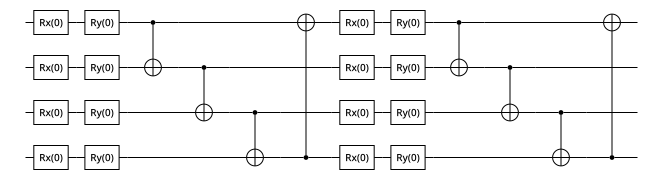

In [45]:
#############################
############ QNN ############
#############################

iters = 300 # number of iterations
lr = 0.05  # learning rate. Start with lr=0.1. Reduce to (e.g. lr=0.01) if optimisation is not smooth.
optim = ADAM(lr) # Descent(lr) # See https://fluxml.ai/Optimisers.jl/dev/api/#Optimisation-Rules for different optimisers.

##### Cost #####
cost_fun = circ_Z
activation = x -> sigmoid(10x) # default is identity
cost = CircuitCost(cost_fun, activation)
################

##### QCNN #####
# ansatz = circ_Ry_conv # circ_Ry_conv, circ_Ry_simple_conv, circ_SU4_conv
# circ = build_QCNN(n, ansatz=ansatz)
################

##### QNN #####
ansatz = circ_HEA
depth = ceil(Int, log2(n))
circ = build_QNN(n, depth, ansatz=ansatz)
###############

##### Model #####
model = GeneralModel(n=n, circ=circ, ansatz=ansatz)
# model = InvariantModel(n=n, circ=circ, ansatz=ansatz) # only valid for QCNN
#################

initialize_params(model);

YaoPlots.plot(circ)
# YaoPlots.plot(cost(n))

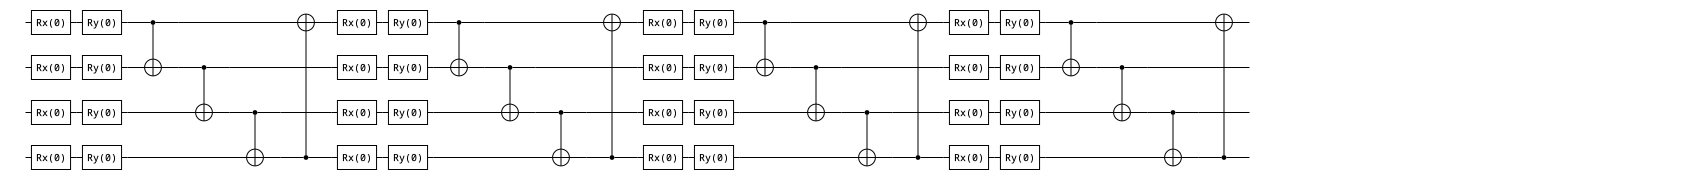

In [46]:
#############################
###### QSNN covariance ######
#############################

iters = 100 # number of iterations
lr = 0.2  # learning rate. Start with lr=0.1. Reduce to (e.g. lr=0.01) if optimisation is not smooth.
optim = ADAM(lr) # Descent(lr) # See https://fluxml.ai/Optimisers.jl/dev/api/#Optimisation-Rules for different optimisers.

##### Cost #####
# observables commute with SWAP
# intrinsically evaluating the quantity abs2 of the overlap
obs_A = chain(2n, put(i=>X) for i = 1:2n) # sum(chain(n, put(i=>X) for i = 1:n))
obs_B = chain(2n, put(i=>Z) for i = 1:2n) # sum(chain(n, put(i=>Z) for i = 1:n))
cost_fun = (output, state1, state2; kwargs...) -> covariance_siamese_commuting_obs(output, state1, state2, obs_A, obs_B; kwargs...)
activation = x -> sigmoid(x, 10, 0.5) # default is identity
cost = GeneralCost(cost_fun, activation)
################

##### QSCNN #####
# cost = circ_Z # NB: loss and gradients still need to be adjusted for conv siamese
# ansatz = circ_Ry_conv # circ_Ry_conv, circ_Ry_simple_conv, circ_SU4_conv
# circ = build_QCNN(n, ansatz=ansatz)
#################

##### QSNN #####
ansatz = circ_HEA
depth = 4 # ceil(Int, log2(n))
circ = build_QNN(n, depth, ansatz=ansatz)
################

##### Model #####
model = GeneralModel(n=n, circ=circ, ansatz=ansatz)
# model = InvariantModel(n=n, circ=circ, ansatz=ansatz) # only valid for QCNN
#################

initialize_params(model);

YaoPlots.plot(circ)
# YaoPlots.plot(cost(n))

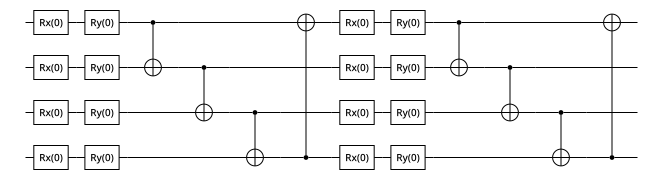

In [49]:
#############################
######### QSNN LCU ##########
#############################

iters = 100 # number of iterations
lr = 0.02  # learning rate. Start with lr=0.1. Reduce to (e.g. lr=0.01) if optimisation is not smooth.
optim = ADAM(lr) # Descent(lr) # See https://fluxml.ai/Optimisers.jl/dev/api/#Optimisation-Rules for different optimisers.

##### Cost #####
cost_fun = circ_swap_all
activation = x -> sigmoid(x, 10, 0.5) # default is identity
cost = CircuitCost(cost_fun, activation)
################

##### QCNN #####
# ansatz = circ_Ry_conv # circ_Ry_conv, circ_Ry_simple_conv, circ_SU4_conv
# circ1 = build_QCNN(n, ansatz=ansatz)
# circ2 = build_QCNN(n, ansatz=ansatz)
################

##### QNN #####
ansatz = circ_HEA
depth = 2 # ceil(Int, log2(n))
circ1 = build_QNN(n, depth, ansatz=ansatz)
circ2 = build_QNN(n, depth, ansatz=ansatz)
###############

##### Model #####
model1 = GeneralModel(n=n, circ=circ1, ansatz=ansatz)
model2 = GeneralModel(n=n, circ=circ2, ansatz=ansatz)
# # model1 = InvariantModel(n=n, circ=circ1, ansatz=ansatz) # only valid for QCNN
# # model2 = InvariantModel(n=n, circ=circ2, ansatz=ansatz)
#################

initialize_params(model1);
initialize_params(model2);

YaoPlots.plot(circ1)
# YaoPlots.plot(obs_A*obs_B)

#### Run

In [46]:
#############################
############ QNN ############
#############################

model_results = train_test_model(d1, d2, model, cost, iters, optim; regularization=:nothing, verbose=true);
# model_results = train_test_model(d1, d2, model, cost, iters, optim; lambda=1e-2, regularization=:l1, verbose=true);
# model_results = train_test_model(d1, d2, model, cost, iters, optim; lambda=6e-4, regularization=:l2, verbose=true);

params, loss_track, tr_track, te_track, tr_preds, te_preds = model_results;

Initial: loss = 1.0269074760991383, tr_acc = 0.525, te_acc = 0.45
Iteration 37: loss = 0.7321608015783796, tr_acc = 0.825, te_acc = 0.65
Iteration 74: loss = 0.7014406082441191, tr_acc = 0.825, te_acc = 0.65
Iteration 111: loss = 0.7003596887283456, tr_acc = 0.825, te_acc = 0.65
Iteration 148: loss = 0.7002346941194579, tr_acc = 0.825, te_acc = 0.65
Iteration 185: loss = 0.7001723034164531, tr_acc = 0.825, te_acc = 0.65
Iteration 222: loss = 0.7001334277964926, tr_acc = 0.825, te_acc = 0.65
Iteration 259: loss = 0.700107202399197, tr_acc = 0.825, te_acc = 0.65
Iteration 296: loss = 0.7000885258846915, tr_acc = 0.825, te_acc = 0.65
Final: loss = 0.7000868307254892, tr_acc = 0.825, te_acc = 0.65


In [ ]:
#############################
###### QSNN covariance ######
#############################

model_results = train_test_model(d1, d2, model, cost, iters, optim; regularization=:nothing, verbose=true);
# model_results = train_test_model(d1, d2, model, cost, iters, optim; lambda=1e-2, regularization=:l1, verbose=true);
# model_results = train_test_model(d1, d2, model, cost, iters, optim; lambda=1e-5, regularization=:l2, verbose=true);

model_params, loss_track, tr_track, te_track, tr_preds, te_preds = model_results;

In [50]:
#############################
######### QSNN LCU ##########
#############################

models = (model1, model2)
model_results = train_test_model(d1, d2, models, cost, iters, optim; regularization=:nothing, verbose=true);
# model_results = train_test_model(d1, d2, models, cost, iters, optim; lambda=1e-4, regularization=:l1, verbose=true);
# model_results = train_test_model(d1, d2, models, cost, iters, optim; lambda=1e-4, regularization=:l2, verbose=true);

model1_params, model2_params, loss_track, tr_track, te_track, tr_preds, te_preds = model_results;

Initial: loss = 2.0, tr_acc = 0.5, te_acc = 0.5
Iteration 12: loss = 2.0, tr_acc = 0.5, te_acc = 0.5
Iteration 24: loss = 2.0, tr_acc = 0.5, te_acc = 0.5
Iteration 36: loss = 2.0, tr_acc = 0.5, te_acc = 0.5
Iteration 48: loss = 2.0, tr_acc = 0.5, te_acc = 0.5
Iteration 60: loss = 2.0, tr_acc = 0.5, te_acc = 0.5
Iteration 72: loss = 2.0, tr_acc = 0.5, te_acc = 0.5
Iteration 84: loss = 2.0, tr_acc = 0.5, te_acc = 0.5
Iteration 96: loss = 2.0, tr_acc = 0.5, te_acc = 0.5
Final: loss = 2.0, tr_acc = 0.5, te_acc = 0.5


#### Plot

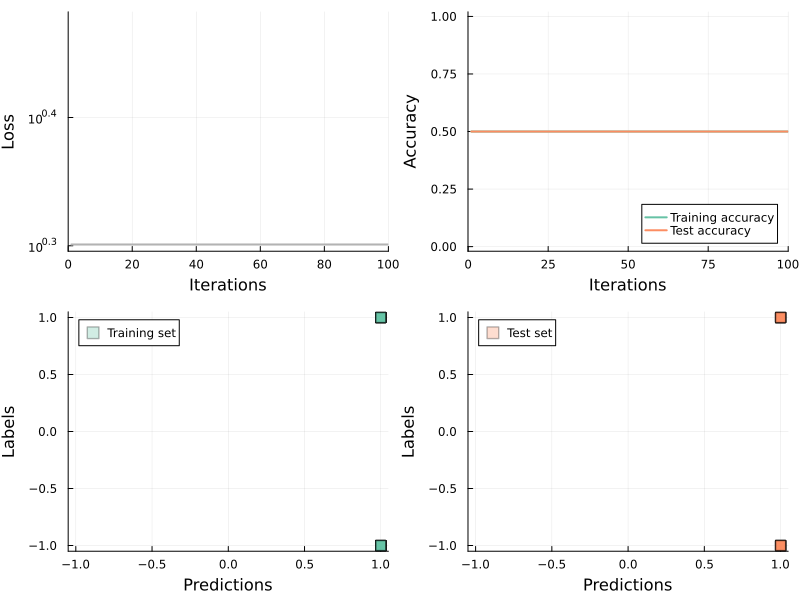

In [51]:
# Loss vs Interations
p1 = Plots.plot(xlim=(0, iters), xlabel="Iterations", ylabel="Loss")
# Plots.hline!([loss_track[1]], label=false, c=0, ylim=(0.9loss_track[1], 1.1loss_track[1]))
Plots.plot!(loss_track, yaxis=:log, label=false, c=0)

# Accuracy vs Interations
p2 = Plots.plot(xlim=(-0.05, iters), ylim=(-0.02, 1.02), xlabel="Iterations", ylabel="Accuracy", legend=:bottomright)
Plots.plot!(tr_track, label="Training accuracy", c=1)
Plots.plot!(te_track, label="Test accuracy", c=2)

# Training labels vs predictions
p3 = Plots.scatter(xlabel="Predictions", ylabel="Labels")
Plots.scatter!(tr_preds, tr_labels, ma=0.3, shape=:rect, label="Training set", c=1, xlim=(-1.05, 1.05), ylim=(-1.05, 1.05))

# Test labels vs predictions
p4 = Plots.scatter(xlabel="Predictions", ylabel="Labels")
Plots.scatter!(te_preds, te_labels, ma=0.3, shape=:rect, label="Test set", c=2, xlim=(-1.05, 1.05), ylim=(-1.05, 1.05))

Plots.plot(p1, p2, p3, p4, layout=(2, 2), size=(800, 600))